In [338]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [339]:
t = sp.Symbol('t')

theta = sp.Function('theta')(t)
d_theta = sp.diff(theta, t)

L = sp.Symbol('L')
J = sp.Symbol('J')

m, g = sp.symbols('m g')

tau_theta = sp.Symbol('tau_theta')
B = sp.Symbol('B')

k = .5 * L

x_cg = k * sp.sin(theta)
y_cg = -k * sp.cos(theta)

dx_cg = sp.diff(x_cg, t)
dy_cg = sp.diff(y_cg, t)

In [340]:
V = m*g*y_cg
T = sp.Rational(1, 2) * (J*d_theta**2 + m * (dx_cg**2 + dy_cg**2))

LAGRANGIAN = T - V

In [341]:
EQ = sp.Eq(
    sp.diff(LAGRANGIAN, theta) - sp.diff(sp.diff(LAGRANGIAN, d_theta), t),
    tau_theta - B*d_theta
)

res = (sp.solve(EQ, sp.diff(d_theta, t))[-1])

In [342]:
res

2.0*(2.0*B*Derivative(theta(t), t) - L*g*m*sin(theta(t)) - 2.0*tau_theta)/(4.0*J + L**2*m)

In [343]:
omega = sp.Symbol('omega')
_theta = sp.Symbol('theta')

lres = res.subs({
    d_theta: omega
})

lres

2.0*(2.0*B*omega - L*g*m*sin(theta(t)) - 2.0*tau_theta)/(4.0*J + L**2*m)

In [344]:
d_omega = sp.lambdify([B, omega, L, g, m, theta, tau_theta, J], lres, modules='numpy')

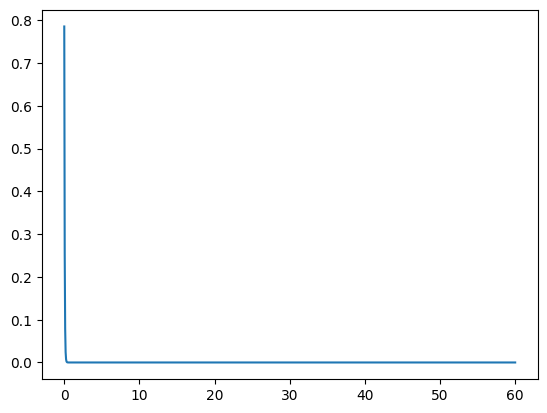

In [346]:
_B = .00001
_L = 1
_g = 9.81
_m = 875

u = 0
c = .45
_J = 1.84e-4

def dsdt(_, s):
    _omega, _theta = s

    tau_theta = c * u * _omega

    return [
        _omega,
        d_omega(_B, _omega, _L, _g, _m, _theta, 0, _J)
    ]


t_eval = np.linspace(1e-4, 60, 1000)
t_span = [t_eval[0], t_eval[-1]]

S_0 = (0, np.pi/4)

sol = solve_ivp(
    dsdt,
    t_span=t_span,
    y0=S_0,
    t_eval=t_eval
)

plt.plot(sol.t, sol.y[1])